In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

In [ ]:
df = pd.read_csv("datasets/customers.csv")

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [6]:
x = df[["Annual Income (k$)", "Spending Score (1-100)"]]

In [7]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [8]:
r = np.arange(start=0.3, stop=0.8, step=0.1)
m = np.arange(start=3, stop=8)

best_score = -1
best_eps = None
best_min_samples = None

for i in r:
    for j in m:
        db = DBSCAN(eps=i, min_samples=j)
        labels = db.fit_predict(x)
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        
        if n_clusters > 1:
            score = silhouette_score(x, labels)
            if score > best_score:
                best_score = score
                best_eps = i
                best_min_samples = j
        
print(f"Best Score: {best_score}")
print(f"Best r(eps): {best_eps}")
print(f"Best m(min_samples): {best_min_samples}")

Best Score: 0.4136187833583574
Best r(eps): 0.3
Best m(min_samples): 3


In [9]:
bd = DBSCAN(eps=best_eps, min_samples=best_min_samples)
labels = bd.fit_predict(x)
labels

array([ 0,  1,  2,  1,  0,  1,  2,  3,  2,  1,  2,  3,  2,  1,  2,  1,  0,
        1,  0,  3,  0,  1,  2,  1,  4,  1,  0, -1,  0,  1,  2,  1,  2,  1,
        4,  1,  4,  1,  5,  1,  5,  1,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  6,  5,  6,  5,  6,  7,  6,  7,  6,  5,  6,  7,  6,
        7,  6,  7,  6,  7,  6,  5,  6,  7,  6,  5,  6,  7,  6,  7,  6,  7,
        6,  7,  6,  7,  6,  7,  6,  5,  6,  7,  6,  8,  6,  8,  6,  8,  6,
        8,  6,  8,  6,  8,  6,  8,  6,  8,  6, -1,  6,  8,  6, -1, -1,  8,
       -1,  8,  6,  8, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [10]:
df["Cluster"] = labels
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,0
1,2,Male,21,15,81,1
2,3,Female,20,16,6,2
3,4,Female,23,16,77,1
4,5,Female,31,17,40,0
...,...,...,...,...,...,...
195,196,Female,35,120,79,-1
196,197,Female,45,126,28,-1
197,198,Male,32,126,74,-1
198,199,Male,32,137,18,-1


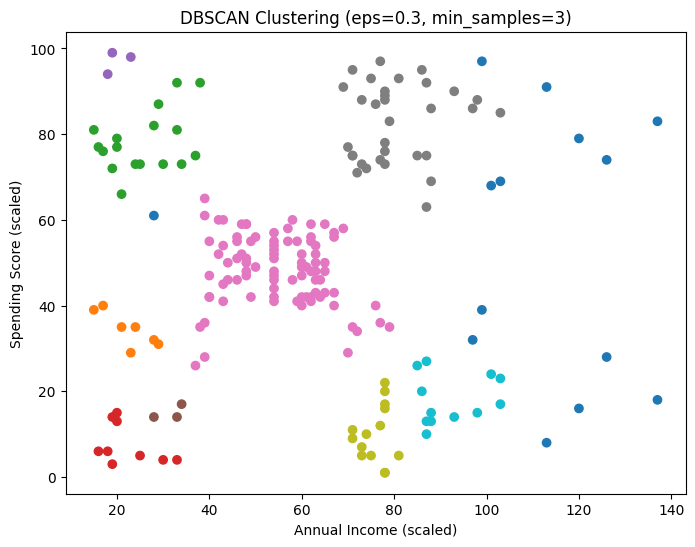


Number of customers in each cluster:
Cluster
-1    14
 0     7
 1    17
 2     9
 3     3
 4     3
 5    89
 6    32
 7    14
 8    12
Name: count, dtype: int64


In [11]:
plt.figure(figsize=(8,6))
plt.scatter(df["Annual Income (k$)"], df["Spending Score (1-100)"], c=df["Cluster"], cmap="tab10")
plt.xlabel("Annual Income (scaled)")
plt.ylabel("Spending Score (scaled)")
plt.title(f"DBSCAN Clustering (eps={best_eps}, min_samples={best_min_samples})")
plt.show()

cluster_counts = df["Cluster"].value_counts().sort_index()
print("\nNumber of customers in each cluster:")
print(cluster_counts)

In [12]:
score = silhouette_score(x, df["Cluster"])
print("Silhouette Score:", score)

Silhouette Score: 0.4136187833583574
